In [23]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [24]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [25]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [38]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [39]:
df.shape

(5169, 2)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   object
 1   text    5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [41]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
df.drop_duplicates(inplace=True)

In [46]:
from sklearn.preprocessing import LabelEncoder

In [48]:
encoder = LabelEncoder()

In [50]:
df['target']=encoder.fit_transform(df['target'])

In [55]:
df.sample(2)

,target,text
2945,0,make that 3! 4 fucks sake?! x
4511,0,Now project pa. After that only i can come.


In [45]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

In [ ]:
# Imbalanced Dataset

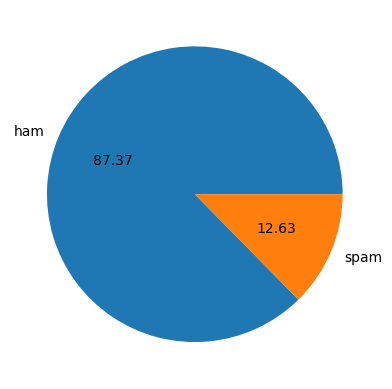

In [70]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [72]:
df['num_characters'] = df['text'].apply(len)

In [74]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [86]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [88]:
nltk.sent_tokenize(df['text'][0])

['Go until jurong point, crazy..',
 'Available only in bugis n great world la e buffet... Cine there got amore wat...']

In [93]:
# Not Spam
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [94]:
#Spam
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

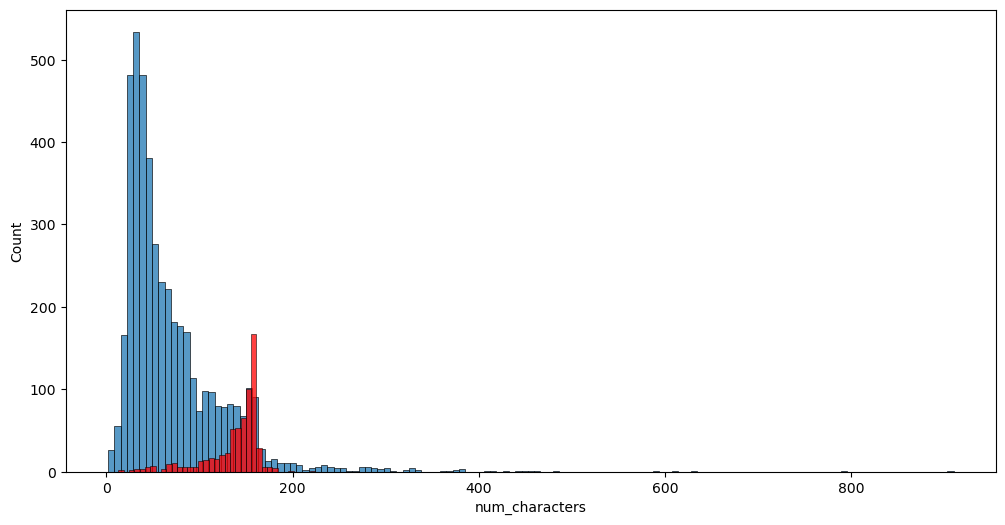

In [99]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

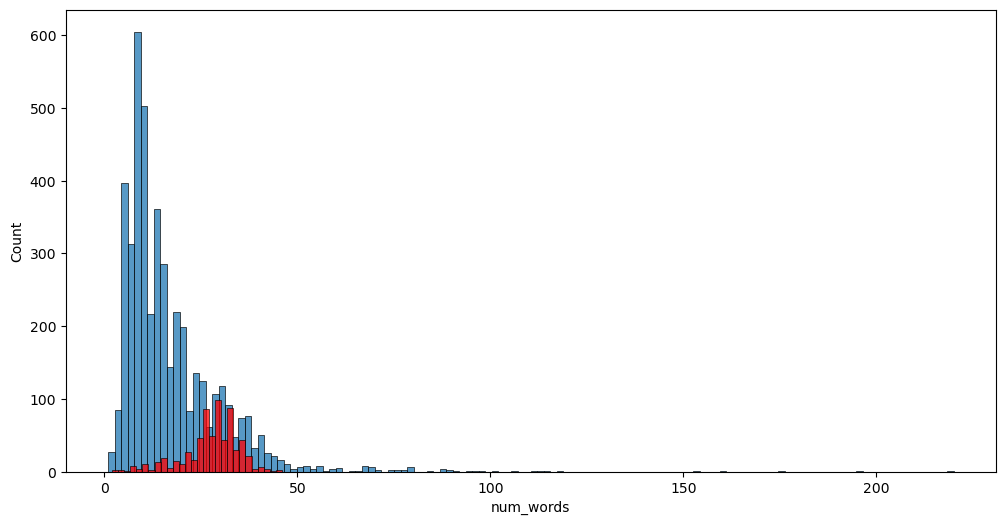

In [100]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

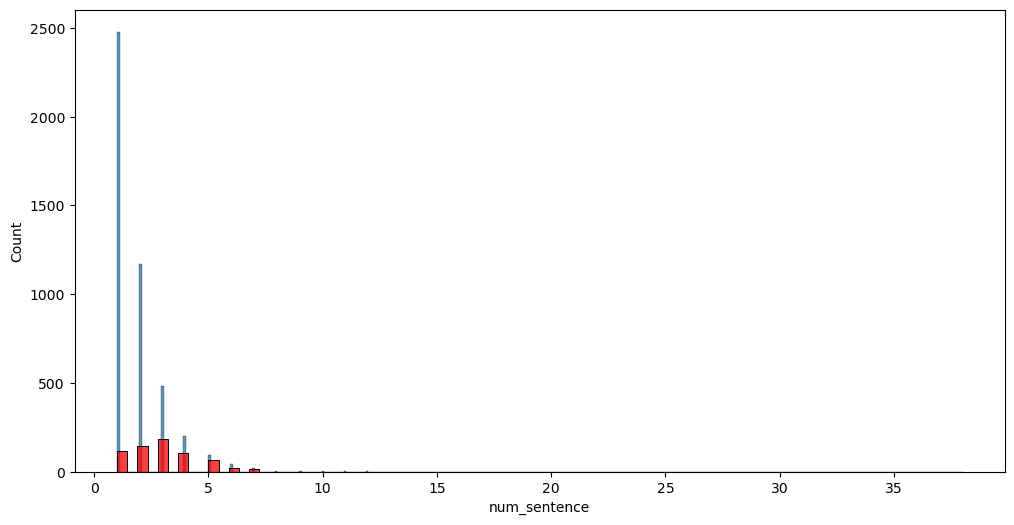

In [101]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentence'])
sns.histplot(df[df['target']==1]['num_sentence'],color='red')

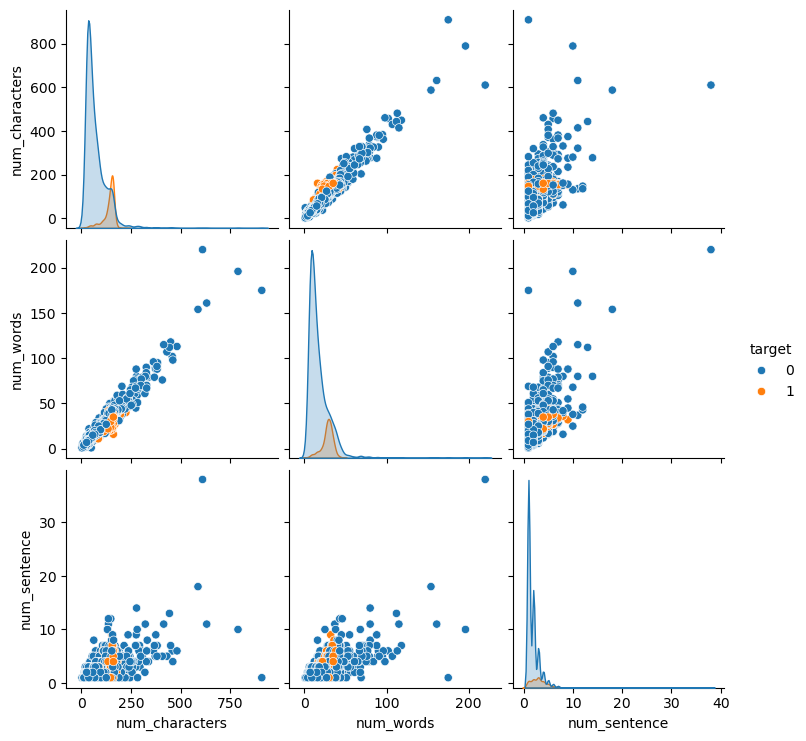

In [104]:
sns.pairplot(df,hue='target')
plt.show()

In [115]:
correlation = df.select_dtypes(include='number').corr()

<Axes: >

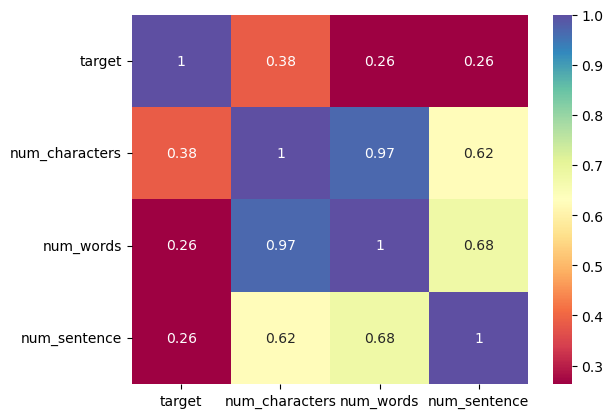

In [120]:
sns.heatmap(correlation,annot=True,cmap='Spectral')

Data Preprocessing
  - lower case
  - Tokenization
  - Remove special characters
  - Removing stop words and punctions
  - stemming

In [172]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
exclude = stopwords.words('english')
ps = PorterStemmer()

In [181]:
def transform_text(text):
    text = text.lower()
    text = [word for word in text.split()]
    text = [word for word in text if word.isalnum()]
    text = [word for word in text if word not in exclude and word not in string.punctuation]
    y = []
    for word in text:
        y.append(ps.stem(word))
    return " ".join(y)

In [189]:
df['transformed_text'] = df['text'].apply(transform_text)

In [191]:
from wordcloud import WordCloud

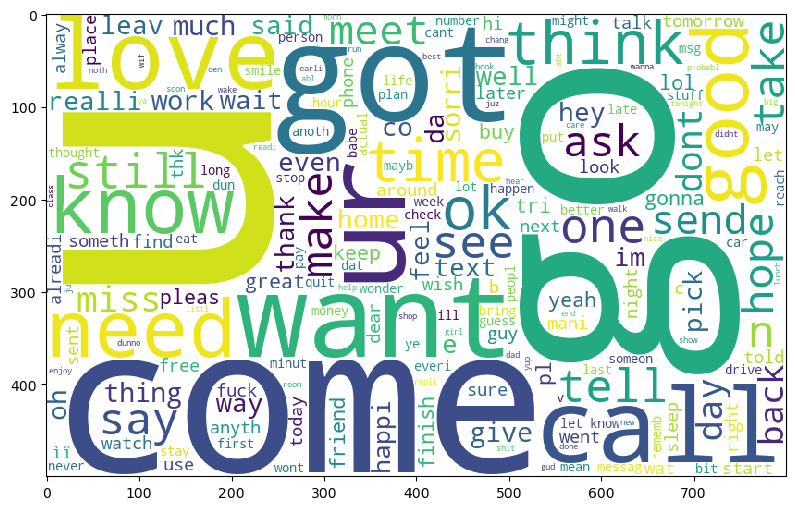

In [228]:
wordcloud_ham = WordCloud(width=800,height=500,background_color='white').generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(wordcloud_ham,interpolation='none')

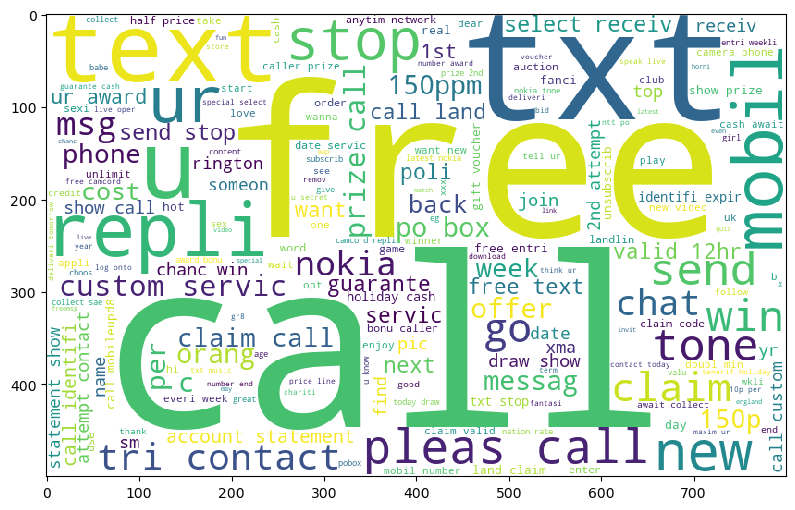

In [227]:
wordcloud_spam = WordCloud(width=800,height=500,background_color='white').generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(wordcloud_spam,interpolation='none')

**Model Building**

In [248]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer()

In [249]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [250]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [252]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [253]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7940038684719536
[[707 189]
 [ 24 114]]
0.37623762376237624


In [254]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9516441005802708
[[896   0]
 [ 50  88]]
1.0


In [255]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[892   4]
 [ 26 112]]
0.9655172413793104


In [259]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 1.4 MB/s eta 0:00:41
    --------------------------------------- 0.8/56.8 MB 1.4 MB/s eta 0:00:41
    --------------------------------------- 1.0/56.8 MB 1.3 MB/s eta 0:00:45
    --------------------------------------- 1.0/56.8 MB 1.3 MB/s eta 0:00:45
    --------------------------------------- 1.3/56.8 MB 957.5 kB/s eta 0:00:58
    --------------------------------------- 1.3/56.8 MB 957.5 kB/s eta 0:00:58
   - -------------------------------------- 1.8/56.8 MB 942.7 kB/s eta 0:00:59
   - -------------------------------------- 2.1/56.8 MB 1.0 MB/s eta 0:00:54
   - -------------------------------------- 2.4/56.8 MB 1.0 MB/s eta 0:00:53
   - ----------------

In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [263]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [264]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [268]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [269]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.965183752417795, 0.9322033898305084)

In [270]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.965183752417795
Precision -  0.9322033898305084


C:\Users\Shiva Kumar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Shiva Kumar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Shiva Kumar\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shiva Kumar\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~

For  KN
Accuracy -  0.8984526112185687
Precision -  1.0
For  NB
Accuracy -  0.9516441005802708
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8529411764705882
For  LR
Accuracy -  0.9497098646034816
Precision -  0.9387755102040817
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9819819819819819
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.875
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8740157480314961
For  ETC
Accuracy -  0.971953578336557
Precision -  0.9823008849557522
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.8981481481481481
For  xgb
Accuracy -  0.9642166344294004
Precision -  0.9243697478991597


In [271]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [272]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.898453,1.000000
2,NB,0.951644,1.000000
8,ETC,0.971954,0.982301
5,RF,0.970019,0.981982
4,LR,0.949710,0.938776
0,SVC,0.965184,0.932203
10,xgb,0.964217,0.924370
9,GBDT,0.949710,0.898148
6,AdaBoost,0.924565,0.875000
7,BgC,0.958414,0.874016


In [273]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))